# Deep Neural Networks using Keras
Classification problem using multiple Perceptron layers, one input layer (2 nodes), one hidden layer (4 nodes) and one output layer (1 node).
<br>Output layer has binary output (True/False)

In [1]:
# Import all required modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/n

In [2]:
# Create Dataset using sklearn datasets
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

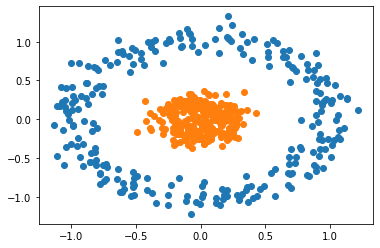

In [3]:
# Plot the Dataset
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [4]:
# Define Keras sequential model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# Train the model using the dataset
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')


Epoch 1/100
500/500 [==============================] - 0s 391us/step - loss: 0.7016 - accuracy: 0.4580
Epoch 2/100
500/500 [==============================] - 0s 78us/step - loss: 0.6946 - accuracy: 0.6220
Epoch 3/100
500/500 [==============================] - 0s 78us/step - loss: 0.6924 - accuracy: 0.6360
Epoch 4/100
500/500 [==============================] - 0s 79us/step - loss: 0.6927 - accuracy: 0.4020
Epoch 5/100
500/500 [==============================] - 0s 91us/step - loss: 0.6906 - accuracy: 0.6940
Epoch 6/100
500/500 [==============================] - 0s 73us/step - loss: 0.6892 - accuracy: 0.6520
Epoch 7/100
500/500 [==============================] - 0s 73us/step - loss: 0.6877 - accuracy: 0.6680
Epoch 8/100
500/500 [==============================] - 0s 78us/step - loss: 0.6851 - accuracy: 0.6200
Epoch 9/100
500/500 [==============================] - 0s 71us/step - loss: 0.6813 - accuracy: 0.6880
Epoch 10/100
500/500 [==============================] - 0s 74us/step - loss: 0.6

Text(0.5, 1.0, 'accuracy')

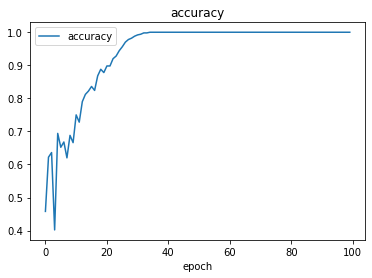

In [6]:
# Plot the Accuracy of the trained model
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

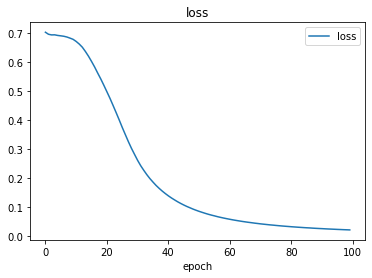

In [7]:
# Plot the Loss of the trained model
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [8]:
# Define function to create grid and return contour plot of predictions
def plot_decision_boundary(X, y, pad):
    # Create x_span of 50 x 1 array of horizontal min and max
    x_span = np.linspace(min(X[:, 0]) - pad, max(X[:, 0]) + pad)
    # Create y_span of 50 x 1 array of vertical min and max
    y_span = np.linspace(min(X[:, 1]) - pad, max(X[:, 1]) + pad)
    # Crate mesh grid: xx (50x50) have x_span values as 50 rows and yy(50x50) have y_span values 50 columns
    xx, yy = np.meshgrid(x_span, y_span)
    # flatten the arrays xx, yy and concatinate them
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Predict the probabilities of all the points in the grid
    pred_func = model.predict(grid)
    # Reshape the probabilities to same shape as xx and convert to numpy array
    z = pred_func.reshape(xx.shape)
    # Plot Contours
    plt.contourf(xx, yy, z)

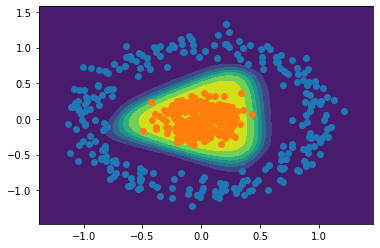

In [9]:
# Plot prediction contour and Input Dataset
plot_decision_boundary(X, y, 0.25)
scatter_plot()

Prediction of point class is  [[0.12643698]]


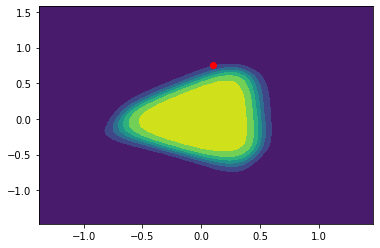

In [10]:
# Predict a class of given point
point = np.array([[0.1, 0.75]])
pred_point = model.predict(point)
plt.plot(point[0][0], point[0][1], 'ro')
print('Prediction of point class is ', pred_point)
plot_decision_boundary(X, y, 0.25)